In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from pylab import rcParams
import warnings
import copy

In [2]:
df = pd.read_csv('abc.csv', parse_dates=['date'], index_col='date')
df.head()

,so2,no2,rspm,spm
date,,,,
2004-01-01,6.433505,58.231014,238.330000,398.000000
2004-01-02,6.433505,58.231014,182.915000,346.500000
2004-01-03,6.433505,58.231014,136.960411,343.926778
2004-01-04,6.433505,58.231014,136.960411,343.926778
2004-01-05,6.433505,58.231014,160.000000,340.000000


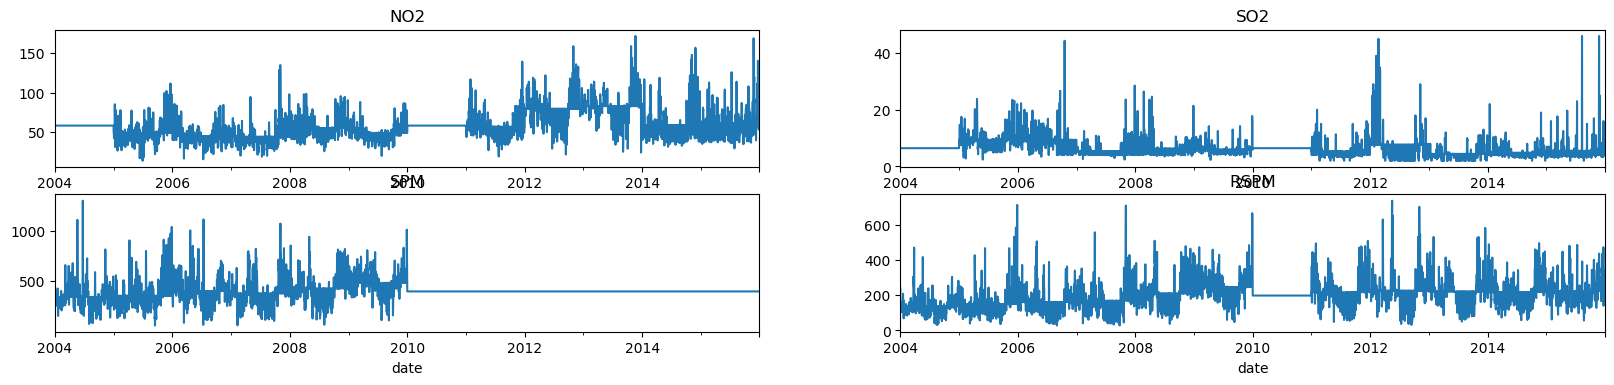

In [3]:
fig, axes = plt.subplots(2,2, figsize=(20,4), dpi=100)
df['no2'].plot(title='NO2', legend=False, ax=axes[0][0])
df['so2'].plot(title='SO2', legend=False, ax=axes[0][1])
df['spm'].plot(title='SPM', legend=False, ax=axes[1][0])
df['rspm'].plot(title='RSPM', legend=False, ax=axes[1][1])

## Defining trend of our dataset

In [4]:
order = 5 #degree of the polynomial defining our trend
# coef variable storing all the coefficient values of the polynomial
coef = np.polyfit(np.arange(len(df['spm'])),
                  df['spm'].values.ravel(),
                  order)
coef

array([-3.84118982e-15,  4.64923220e-11, -1.96597094e-07,  3.24706285e-04,
       -1.34448309e-01,  3.56269228e+02])

In [5]:
#defining our polynomial
poly_mdl = np.poly1d(coef)
poly_mdl

poly1d([-3.84118982e-15,  4.64923220e-11, -1.96597094e-07,  3.24706285e-04,
       -1.34448309e-01,  3.56269228e+02])

In [6]:
#theoritical value (trend) of our dataset
trend = pd.Series(data = poly_mdl(np.arange(len(df['spm']))),
                  index = df.index)

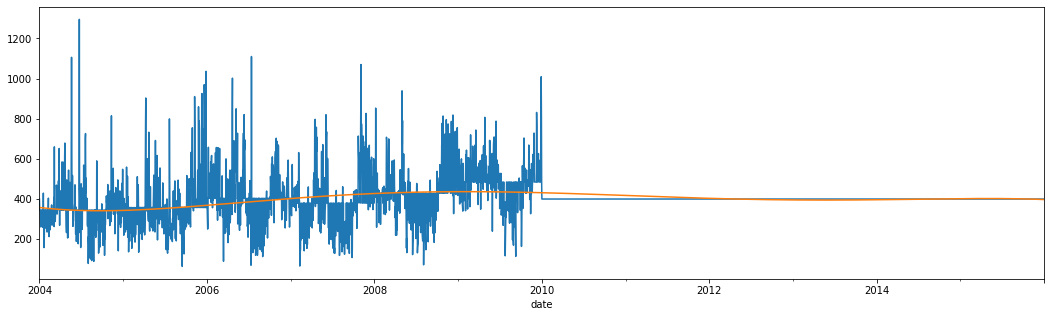

In [7]:
# plotting actual dataset with the theoritical trend.
rcParams['figure.figsize'] = 18, 5
df['spm'].plot()
trend.plot()
plt.show()

## Detrending the data

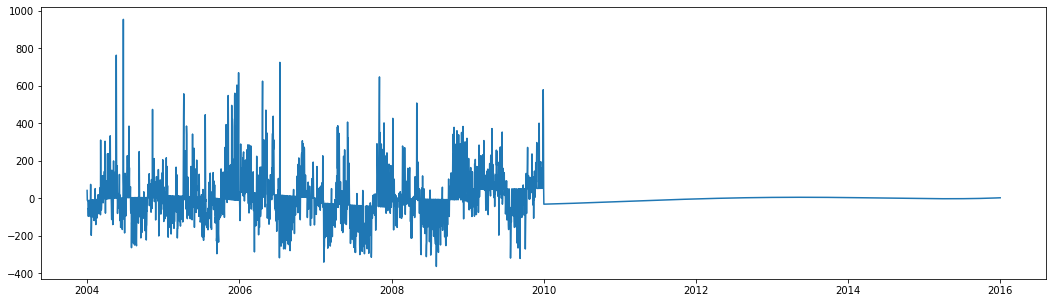

In [8]:
# removing trend from the dataset
detrended = df['spm'] - trend
plt.plot(detrended)

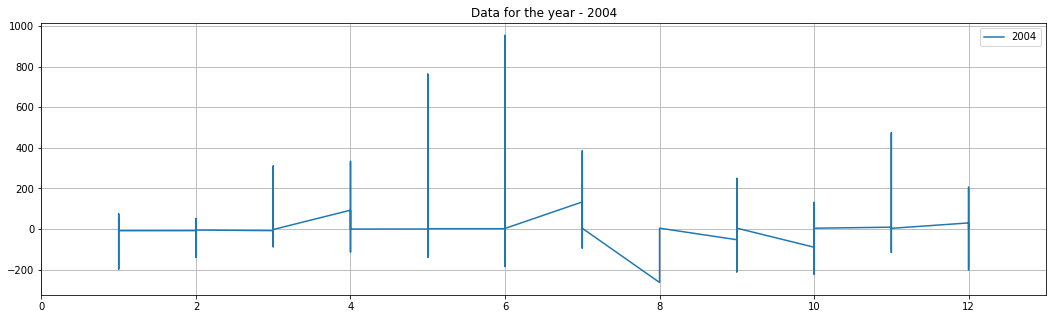

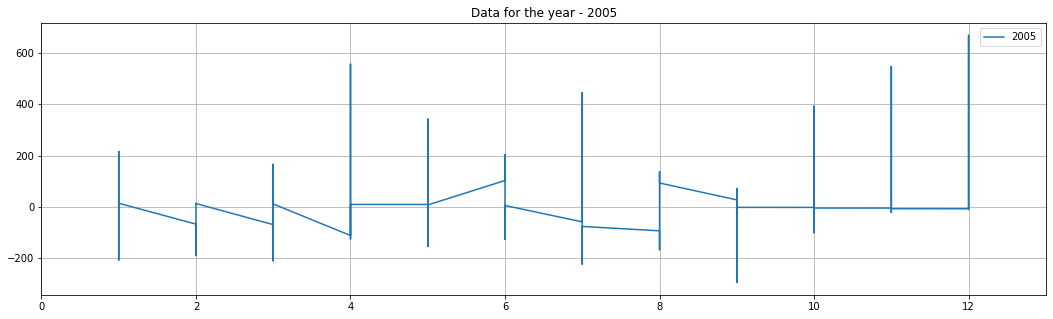

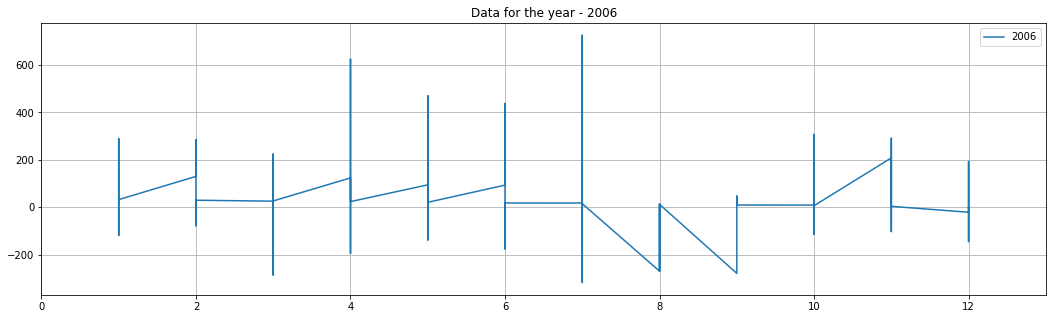

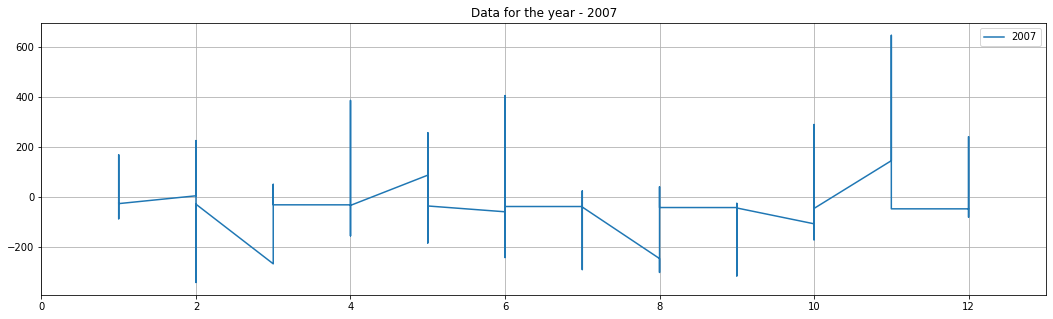

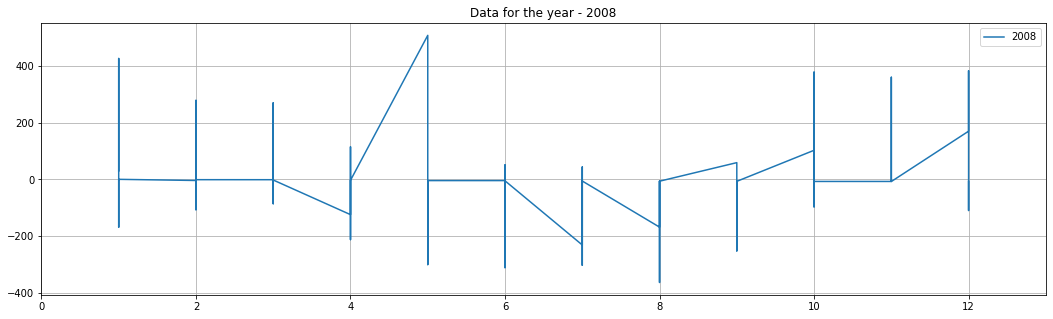

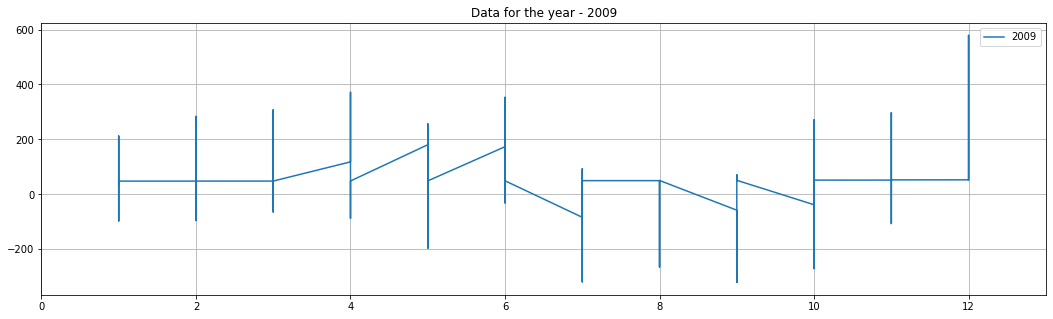

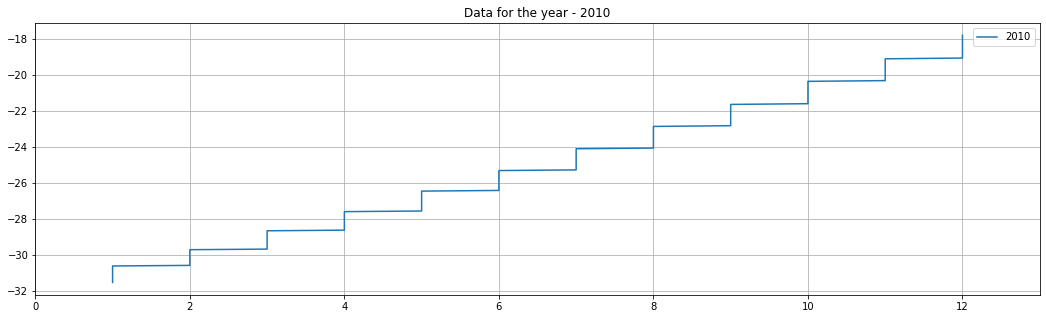

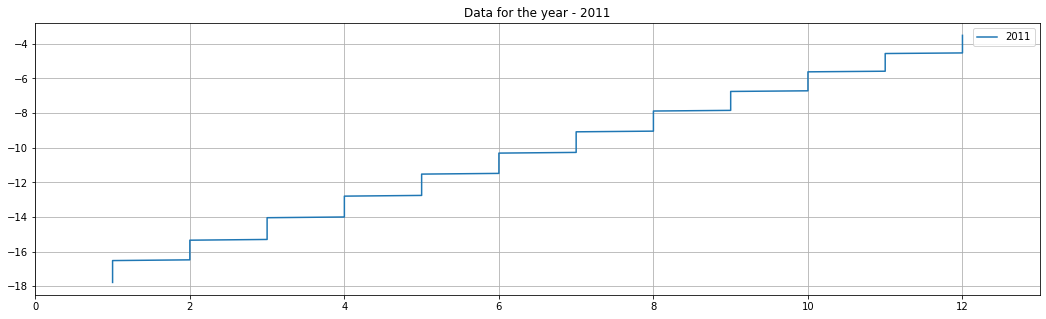

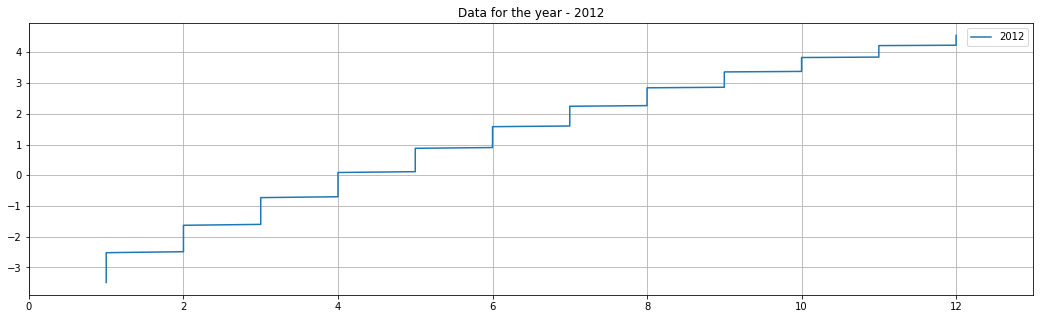

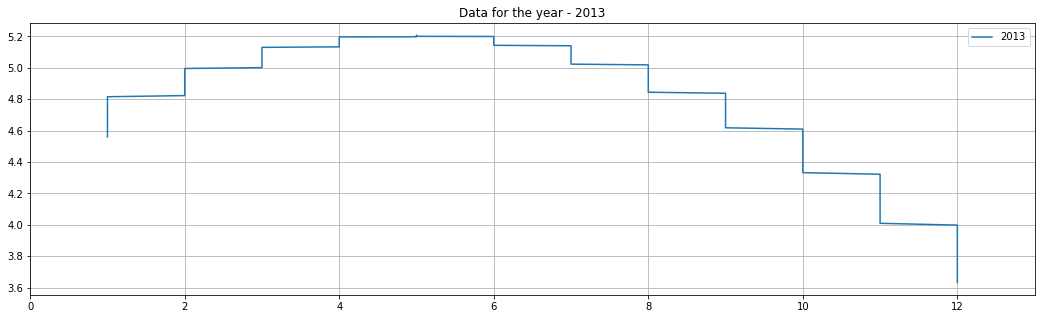

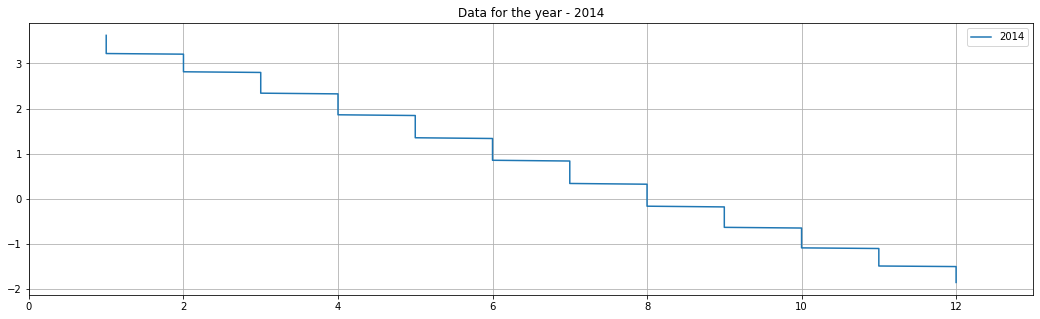

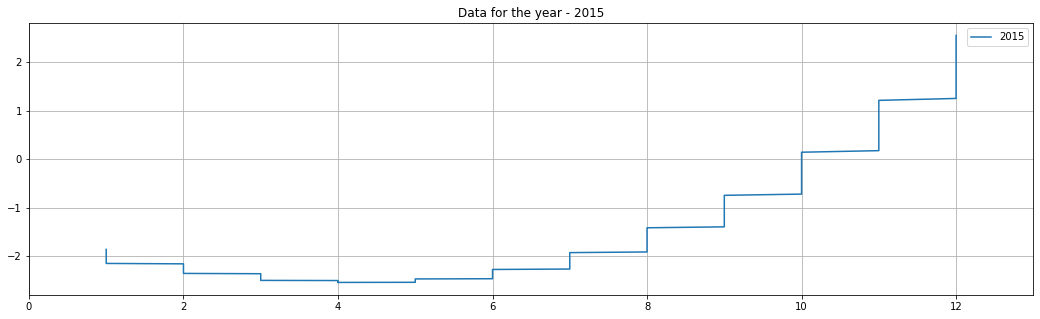

In [9]:
# grouping detrended data anf plotting it yearly
rcParams['figure.figsize'] = 18,5
yearly_data = detrended.groupby(by = detrended.index.year)
for year in yearly_data.groups:
    plt.plot(yearly_data.get_group(year).index.month, yearly_data.get_group(year).values, label=year)
    plt.title("Data for the year - " + str(year))
    axes = plt.gca()
    axes.set_xlim([0,13])
    plt.grid()
    plt.legend()
    plt.show()

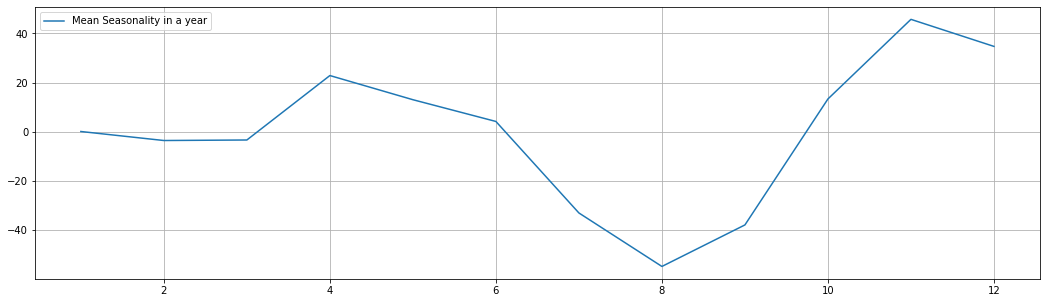

In [10]:
# monthly mean plotting of the detrended data
seasonal = detrended.groupby(by = detrended.index.month).mean()
plt.plot(seasonal, label='Mean Seasonality in a year')
plt.grid()
plt.legend()
plt.show()

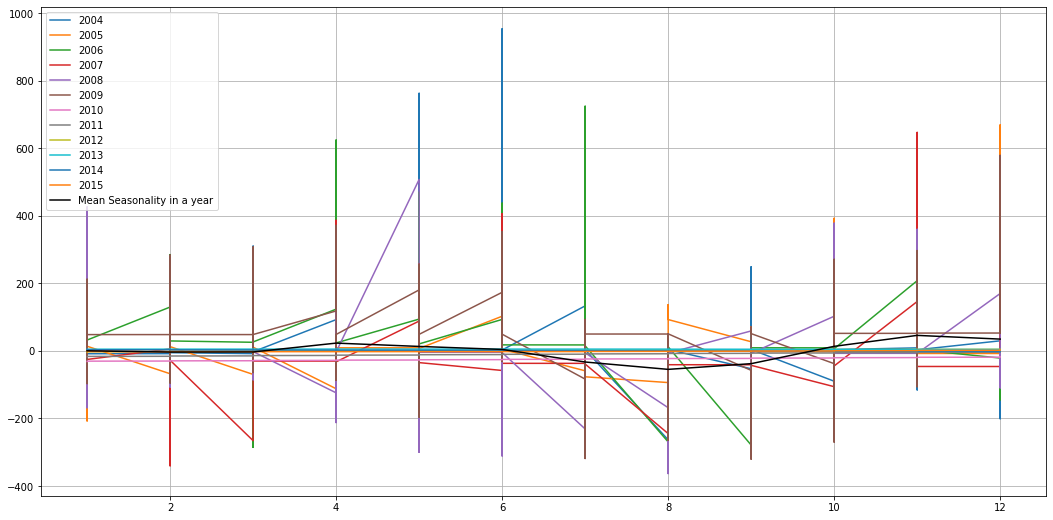

In [11]:
# plotting monthly mean dataset for all years
rcParams['figure.figsize'] = 18,9
yearly_data = detrended.groupby(by = detrended.index.year)
for year in yearly_data.groups:
    plt.plot(yearly_data.get_group(year).index.month, yearly_data.get_group(year).values, label=year)

plt.plot(seasonal, color="black", label='Mean Seasonality in a year')
plt.grid()
plt.legend()
plt.show()

## Removing seasonality

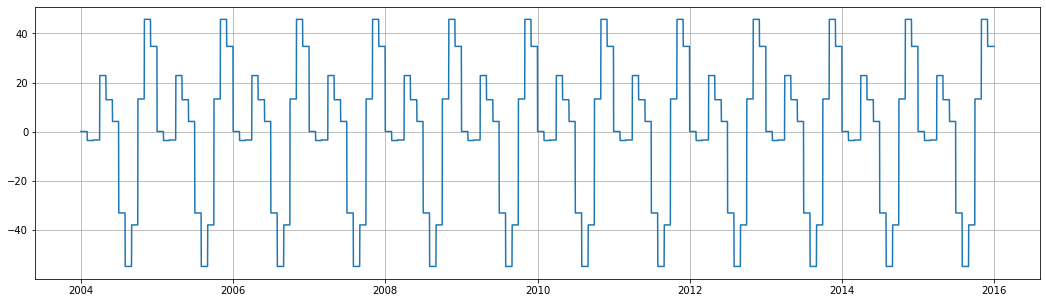

In [12]:
# plotting seasonality of the dataset
rcParams['figure.figsize'] = 18,5
seasonal_component = copy.deepcopy(df['spm'])
for date in seasonal.index:
    seasonal_component.loc[seasonal_component.index.month == date] = seasonal.loc[date]
plt.plot(seasonal_component)
plt.grid()
plt.show()

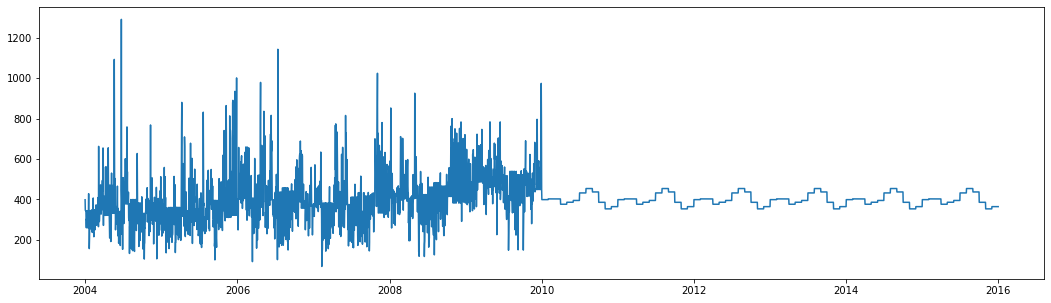

In [13]:
# removing seasonality
deseasonal = df['spm'] - seasonal_component
plt.plot(deseasonal)

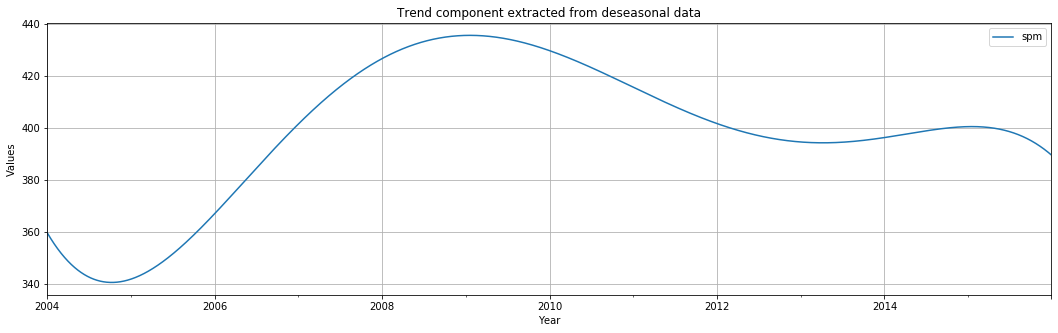

In [16]:
# extracting trend for deseasonal data
order = 5
coef = np.polyfit(np.arange(len(deseasonal)),
                 deseasonal.values.ravel(),
                 order)

poly_mdl = np.poly1d(coef)

trend_component = pd.DataFrame(data = poly_mdl(np.arange(len(df['spm']))),
                          index = df.index,
                          columns=['spm'])
trend_component.plot()
plt.title('Trend component extracted from deseasonal data')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid()

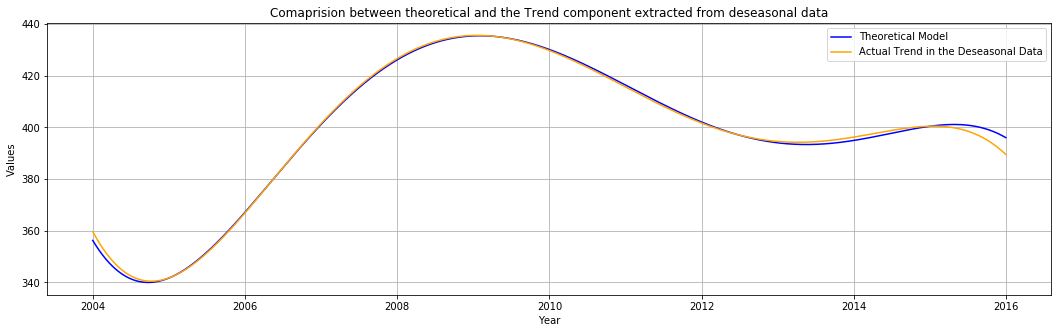

In [17]:
# comparing theoritical trend with the actual trend of deseasonal data  
rcParams['figure.figsize'] = 18, 5
plt.plot(trend, color='blue', label='Theoretical Model')
plt.plot(trend_component, color='orange', label='Actual Trend in the Deseasonal Data')
plt.title('Comaprision between theoretical and the Trend component extracted from deseasonal data')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()